In [1]:
import tensorflow
from tensorflow import keras

D:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages

In [2]:
# carregar dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
# explorando os dados
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
len(imagens_treino)

60000

In [5]:
imagens_treino.shape

(60000, 28, 28)

In [6]:
imagens_teste.shape

(10000, 28, 28)

In [7]:
identificacoes_treino.shape

(60000,)

In [8]:
identificacoes_teste.shape

(10000,)

Text(0.5, 1.0, '9')

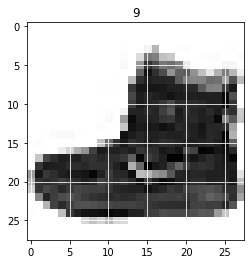

In [3]:
import matplotlib.pyplot as plt

# verificando imagem
plt.imshow(imagens_treino[0], cmap = 'gray_r')
plt.grid(color = 'w')
plt.title(identificacoes_treino[0])

In [10]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())

0
9


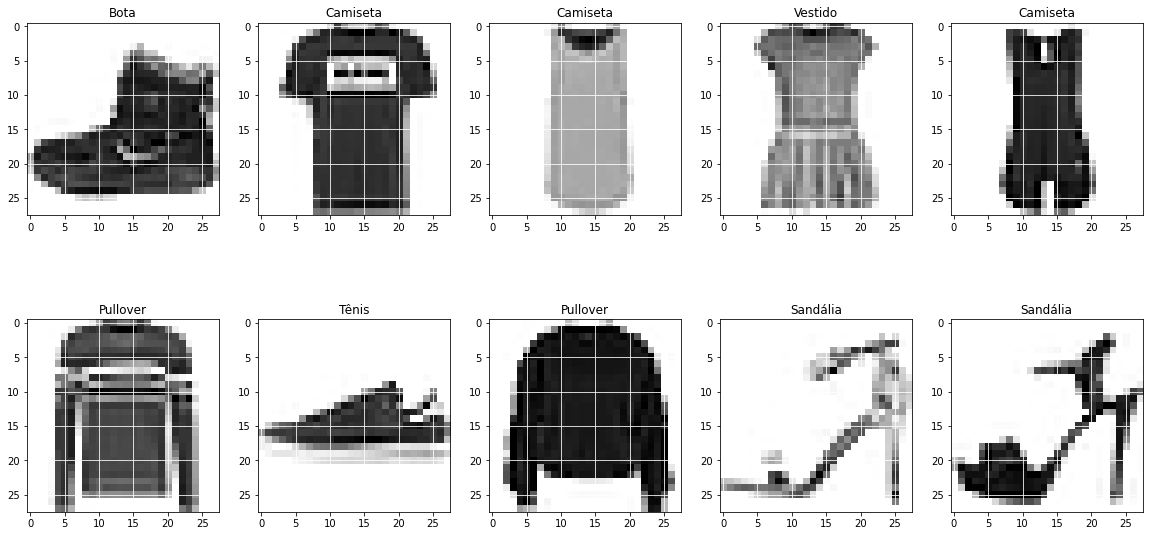

In [4]:
# exibindo os dados

total_classificacoes = 10

nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.figure(figsize=(20,10))
for imagem in range(10):
    plt.subplot(2,5, imagem+1)
    plt.imshow(imagens_treino[imagem], cmap = 'gray_r')
    plt.grid(color = 'w')
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

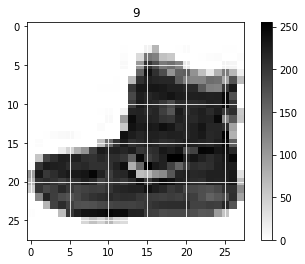

In [12]:
plt.imshow(imagens_treino[0], cmap = 'gray_r')
plt.grid(color = 'w')
plt.title(identificacoes_treino[0])
plt.colorbar()

In [5]:
# normalização
imagens_treino = imagens_treino / float(255)

# criando e compilando o modelo, normalizando com Dropout
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(total_classificacoes, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 18s 370us/sample - loss: 0.5255 - acc: 0.8148 - val_loss: 0.4055 - val_acc: 0.8539
Epoch 2/5
48000/48000 [==============================] - 15s 303us/sample - loss: 0.3972 - acc: 0.8552 - val_loss: 0.3755 - val_acc: 0.8620
Epoch 3/5
48000/48000 [==============================] - 15s 309us/sample - loss: 0.3624 - acc: 0.8664 - val_loss: 0.3420 - val_acc: 0.8763
Epoch 4/5
48000/48000 [==============================] - 15s 303us/sample - loss: 0.3376 - acc: 0.8746 - val_loss: 0.3542 - val_acc: 0.8727
Epoch 5/5
48000/48000 [==============================] - 14s 301us/sample - loss: 0.3222 - acc: 0.8801 - val_loss: 0.3281 - val_acc: 0.8803


In [6]:
#salvando o modelo
modelo.save('modelo.h5')

In [27]:
historico.history

{'loss': [2.30260578028361,
  2.300125144481659,
  2.289779469648997,
  2.267530625184377,
  2.231848450342814],
 'acc': [0.099854164, 0.11770833, 0.1624375, 0.23220833, 0.26660416],
 'val_loss': [2.3022163162231446,
  2.2973219388326007,
  2.2805032958984377,
  2.2510109990437828,
  2.208764499028524],
 'val_acc': [0.09575, 0.0995, 0.16825, 0.25283334, 0.28116667]}

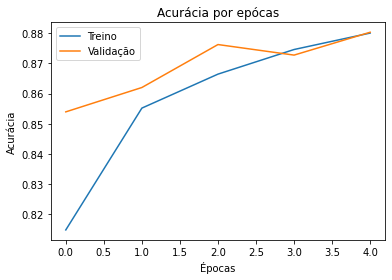

In [7]:
# Visualizando a acurácia
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por epócas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

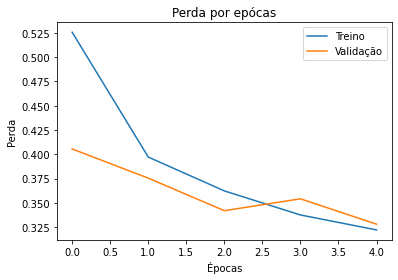

In [8]:
# Visualizando as perdas
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por epócas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [11]:
# testando o modelo
testes = modelo.predict(imagens_teste)

In [12]:
import numpy as np

np.argmax(testes[0])

9

In [13]:
print('resultado teste: ', np.argmax(testes[0]))
print('número da imagem de teste: ', identificacoes_teste[0])

resultado teste:  9
número da imagem de teste:  9


In [14]:
print('resultado teste: ', np.argmax(testes[4]))
print('número da imagem de teste: ', identificacoes_teste[4])

resultado teste:  6
número da imagem de teste:  6


In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('perda do teste: ', perda_teste)
print('acuracia do teste: ', acuracia_teste)

10000/10000 [==============================] - 1s 103us/sample - loss: 2.3675 - acc: 0.8495
perda do teste:  2.367548790144917
acuracia do teste:  0.8495


In [16]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print('perda do teste: ', perda_teste)
print('acuracia do teste: ', acuracia_teste)

10000/10000 [==============================] - 1s 142us/sample - loss: 2.3675 - acc: 0.8495
perda do teste:  2.367548790144917
acuracia do teste:  0.8495
